In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('/media/ruairi/UBUNTU/db/perfection.csv')

/home/ruairi/anaconda3/envs/ephys/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df['response'].value_counts(dropna=False)

excluded     85918
no effect    46569
decrease     36822
increase     32490
Name: response, dtype: int64

In [4]:
df = df[df['response']!='excluded']

In [5]:
def normalise2(df):
    return df.groupby('neuron_id')['firing_rate'].apply(lambda x: x.divide(np.mean(x.iloc[:len(x)//2])).multiply(100))

In [6]:
cit = df[df['experiment_name']=='CIT_WAY'].copy()
cit['normalised'] = normalise2(cit)

/home/ruairi/anaconda3/envs/ephys/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


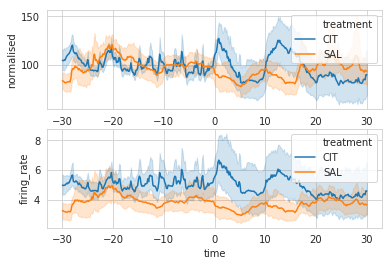

In [7]:
f, a = plt.subplots(nrows=2)


sns.lineplot(data=cit[(cit["hc_cluster"]=='Clocklike Slow Regular')], 
                 x='time', y='normalised', 
                 hue='treatment', hue_order=['CIT', 'SAL'],
                 ax=a[0])

sns.lineplot(data=cit[(cit["hc_cluster"]=='Clocklike Slow Regular')], 
                 x='time', y='firing_rate', 
                 hue='treatment', hue_order=['CIT', 'SAL'],
                 ax=a[1])
plt.show()

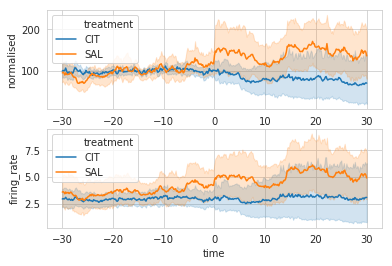

In [8]:
f, a = plt.subplots(nrows=2)


sns.lineplot(data=cit[(cit["hc_cluster"]=='Slow Irregular')], 
                 x='time', y='normalised', 
                 hue='treatment', hue_order=['CIT', 'SAL'],
                 ax=a[0])

sns.lineplot(data=cit[(cit["hc_cluster"]=='Slow Irregular')], 
                 x='time', y='firing_rate', 
                 hue='treatment', hue_order=['CIT', 'SAL'],
                 ax=a[1])
plt.show()

## CIT

In [9]:
df1 = cit[cit['treatment']=='SAL']
df2 = cit[(cit['treatment']=='CIT') & (cit['response']=='increase')]
df3 = cit[(cit['treatment']=='CIT') & (cit['response']=='decrease')]
# df4 = cit[(cit['treatment']=='CIT') & (cit['response']=='no effect')]
df5 = cit[cit['treatment']=='CIT']

df1['group'] = 'Saline'
df2['group'] = 'CIT Increase'
df3['group'] = 'CIT Decrease'
# df4['group'] = 'CIT Non Responders'
# df5['group'] = 'CIT All Neurons'

cit2 = pd.concat([df1, df2, df3])

/home/ruairi/anaconda3/envs/ephys/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/ruairi/anaconda3/envs/ephys/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/ruairi/anaconda3/envs/ephys/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

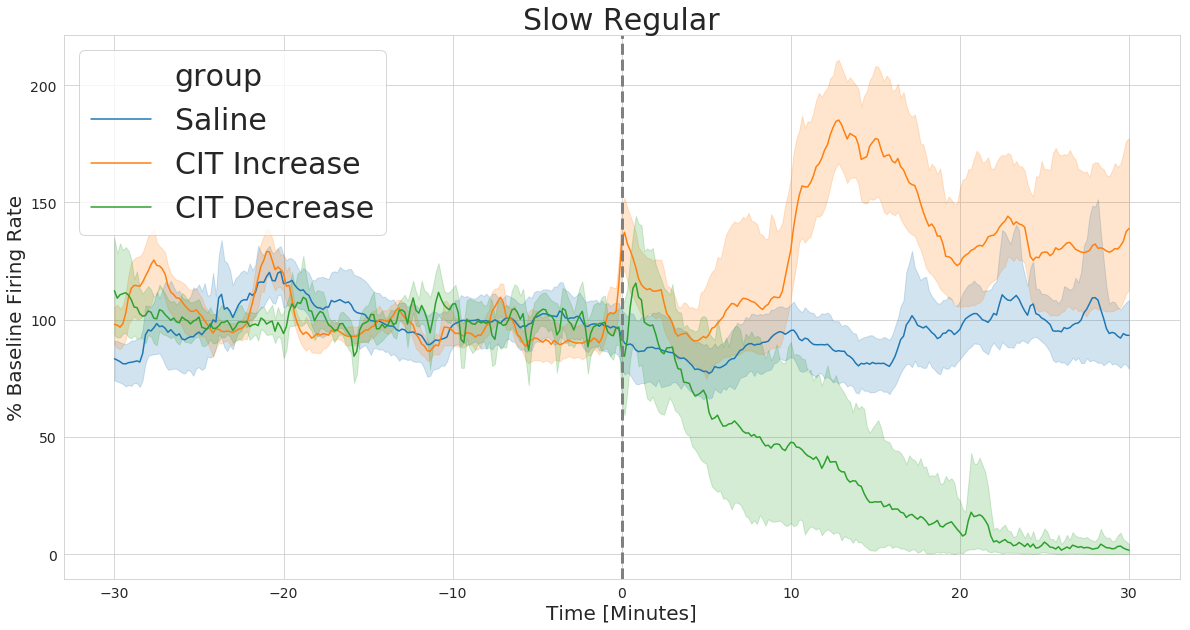

In [10]:



f, a = plt.subplots(figsize=(20, 10))


sns.lineplot(data=cit2[cit2["hc_cluster"]=='Clocklike Slow Regular'], 
                     x='time', y='normalised', 
                     hue='group',
                     ax=a)

a.set_ylabel('% Baseline Firing Rate', fontdict={'fontsize':20})
a.set_xlabel('Time [Minutes]', fontdict={'fontsize':20})
a.axvline(0, linewidth=3, linestyle='--', color='grey')
for tick in a.xaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
for tick in a.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
a.legend(loc=0, prop={'size': 30})
a.set_title('Slow Regular', fontdict={'fontsize': 30})
plt.savefig('/media/ruairi/UBUNTU/figures/lines/cit_sr.png', dpi=300)

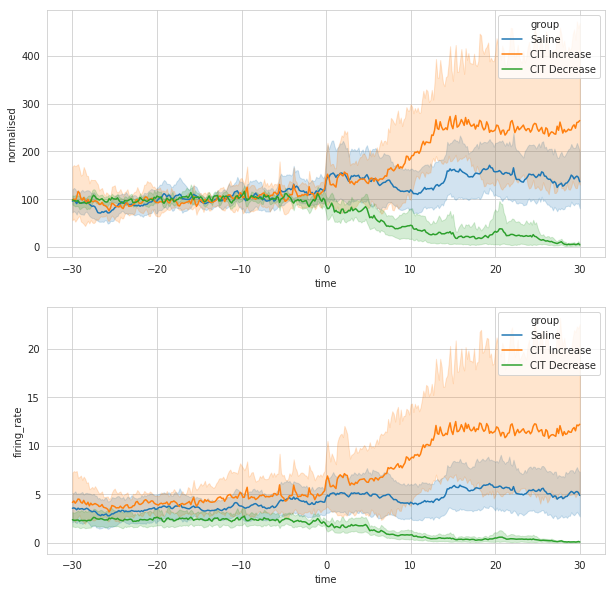

In [11]:
f, a = plt.subplots(nrows=2, figsize=(10, 10))


sns.lineplot(data=cit2[(cit2["hc_cluster"]=='Slow Irregular')], 
                 x='time', y='normalised', 
                 hue='group',
                 ax=a[0])

sns.lineplot(data=cit2[(cit2["hc_cluster"]=='Slow Irregular')], 
                 x='time', y='firing_rate', 
                 hue='group',
                 ax=a[1])
plt.show()

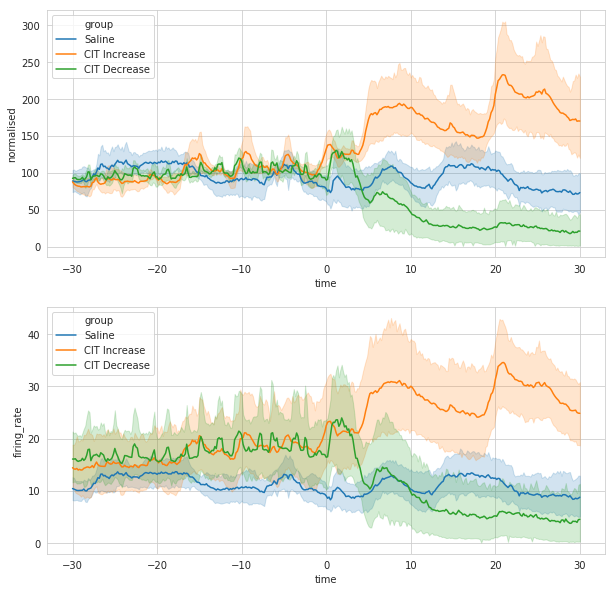

In [12]:
f, a = plt.subplots(nrows=2, figsize=(10, 10))


sns.lineplot(data=cit2[(cit2["hc_cluster"]=='Fast Varied')], 
                 x='time', y='normalised', 
                 hue='group',
                 ax=a[0])

sns.lineplot(data=cit2[(cit2["hc_cluster"]=='Fast Varied')], 
                 x='time', y='firing_rate', 
                 hue='group',
                 ax=a[1])
plt.show()

In [13]:
cit2["hc_cluster"].value_counts()

Clocklike Slow Regular    20938
Slow Irregular            11552
Fast Varied                8664
Very Fast Regular          2888
Name: hc_cluster, dtype: int64

### SERT

In [14]:
sert = df[df['experiment_name']=='SERT_DREADD'].copy()
sert['normalised'] = normalise2(sert)


# df1 = sert[sert['virus']=='mCherry']
df2 = sert[(sert['virus']=='mCherry') & (sert['response']=='increase')]
df3 = sert[(sert['virus']=='hM3Dq') & (sert['response']=='increase')]
# df5 = sert[sert['treatment']=='CIT']

# df1['group'] = 'mCherry'
df2['group'] = 'mCherry Increase'
df3['group'] = 'hM3Dq Increase'
# df4['group'] = 'CIT Non Responders'
# df5['group'] = 'CIT All Neurons'

sert2 = pd.concat([df2, df3])

/home/ruairi/anaconda3/envs/ephys/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/ruairi/anaconda3/envs/ephys/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


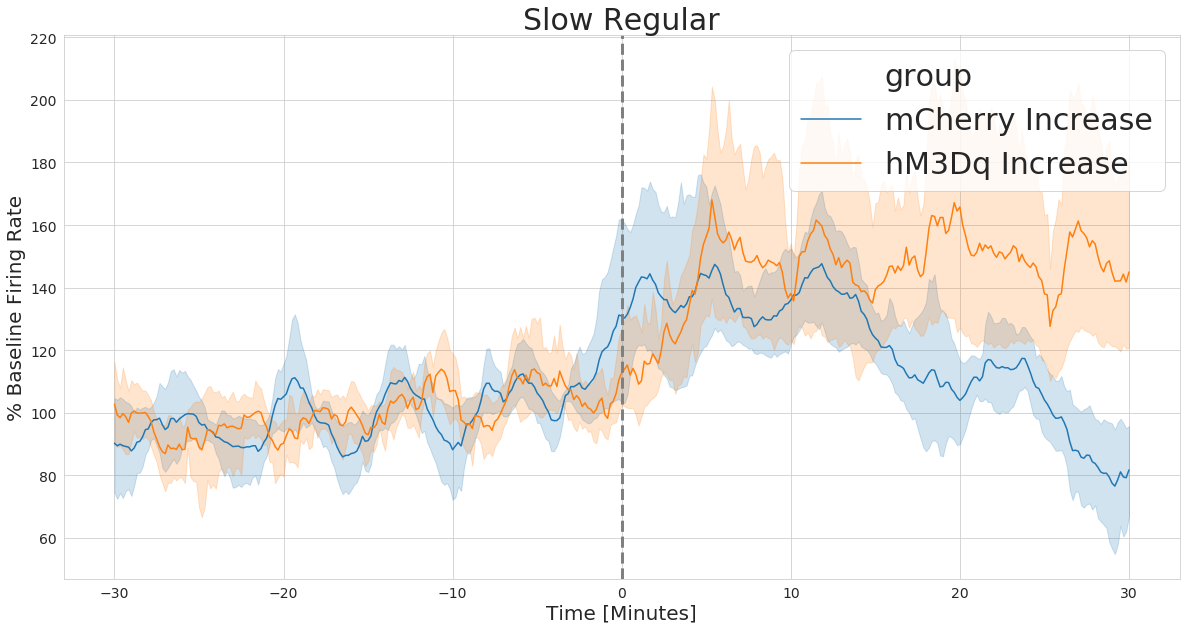

In [15]:
f, a = plt.subplots(figsize=(20, 10))


sns.lineplot(data=sert2[sert2["hc_cluster"]=='Clocklike Slow Regular'], 
                     x='time', y='normalised', 
                     hue='group',
                     ax=a)

a.set_ylabel('% Baseline Firing Rate', fontdict={'fontsize':20})
a.set_xlabel('Time [Minutes]', fontdict={'fontsize':20})
a.axvline(0, linewidth=3, linestyle='--', color='grey')
for tick in a.xaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
for tick in a.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
a.set_title('Slow Regular', fontdict={'fontsize': 30})
a.legend(loc=0, prop={'size': 30})
plt.savefig('/media/ruairi/UBUNTU/figures/lines/sert_sr.png', dpi=300)

In [16]:
### GAT

In [17]:
gat = df[df['experiment_name']=='GAT_DREADD'].copy()
gat['normalised'] = normalise2(gat)


# df1 = sert[sert['virus']=='mCherry']
df2 = gat[(gat['virus']=='mCherry') 
           & (gat['response']=='decrease')]
df3 = gat[(gat['virus']=='hM3Dq') 
           & (gat['response']=='decrease')]
# df5 = sert[sert['treatment']=='CIT']

# df1['group'] = 'mCherry'
df2['group'] = 'mCherry Decrease'
df3['group'] = 'hM3Dq Decrease'
# df4['group'] = 'CIT Non Responders'
# df5['group'] = 'CIT All Neurons'

gat2 = pd.concat([df2, df3])

/home/ruairi/anaconda3/envs/ephys/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/home/ruairi/anaconda3/envs/ephys/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


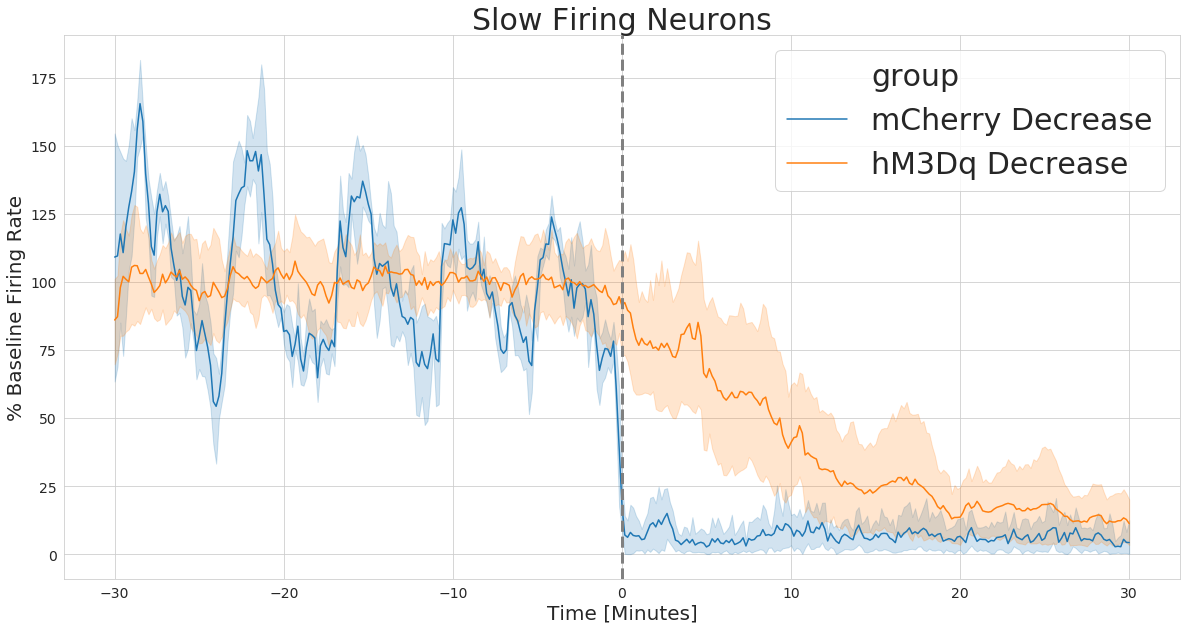

In [22]:
f, a = plt.subplots(figsize=(20, 10))


sns.lineplot(data=gat2, 
                     x='time', y='normalised', 
                     hue='group',
                     ax=a)

a.set_ylabel('% Baseline Firing Rate', fontdict={'fontsize':20})
a.set_xlabel('Time [Minutes]', fontdict={'fontsize':20})
a.axvline(0, linewidth=3, linestyle='--', color='grey')
for tick in a.xaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
for tick in a.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
a.legend(loc=0, prop={'size': 30})
a.set_title('Slow Firing Neurons', fontdict={'fontsize': 30})
plt.savefig('/media/ruairi/UBUNTU/figures/lines/gat.png', dpi=300)

In [23]:
gat2.groupby(['group', 'neuron_id']).apply(len)

group             neuron_id
hM3Dq Decrease    726          361
                  730          361
                  745          361
                  748          361
                  750          361
                  751          361
                  752          361
                  753          361
                  758          361
                  763          361
mCherry Decrease  706          361
                  708          361
                  709          361
                  716          361
dtype: int64